# Unit 5 - Financial Planning

In [191]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [192]:
# Load .env enviroment variables
load_dotenv("ALPACE_API.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [193]:
# Set current amount of crypto assets
eth = 5.3
btc = 1.2

In [194]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [195]:
# Fetch current BTC price

btc_data = requests.get(btc_url).json()


# Fetch current ETH price

eth_data = requests.get(eth_url).json()


# Compute current value of my crpto

btc_current_value = btc_data['data']['1']['quotes']['USD']['price']
eth_current_value = eth_data['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance

print(f"{btc_current_value:0.2f}")
print(f"{eth_current_value:0.2f}")

26933.00
1686.07


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [196]:
# Set current amount of shares

my_agg = 200
my_spy = 50

In [197]:
# Set Alpaca API key and secret

API_KEY = 'PKFCSCOO1SGRSA5EAGER'
SECRET_KEY = 'MhTgbgWMkjOJwXq6DR7qMf73tEpZjE6Cr7YWuy9w'
ENDPOINT = 'https://paper-api.alpaca.markets'

# Create the Alpaca API object

alpaca = tradeapi.REST(API_KEY, SECRET_KEY, api_version="v2", base_url = ENDPOINT)

In [198]:
# Format current date as ISO format

today = pd.Timestamp("2023-07-28", tz="America/New_York").isoformat()

# Set the tickers

tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API

timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(tickers,timeframe,start = today,end = today,limit = 1000).df

# Reorganize the DataFrame
# Separate ticker data

AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

In [199]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio.loc[current_date, ('AGG', 'close')]
spy_close_price = df_portfolio.loc[current_date, ('SPY', 'close')]

# Print AGG and SPY close prices

print(f"{agg_close_price}")
print(f"{spy_close_price}")

97.56
456.92


In [200]:
# Compute the current value of shares

share_value_spy = spy_close_price * my_spy
share_value_agg = agg_close_price * my_agg

# Print current value of shares

print(f"{share_value_spy:0.2f}")
print(f"{share_value_agg:0.2f}")

22846.00
19512.00


### Savings Health Analysis

In [212]:
# Set monthly household income

monthly_income = 12000

# Consolidate financial assets data

total_savings = df_savings['amount'].sum()

consolidated_crypto = btc_current_value + eth_current_value
# Create savings DataFrame
value_data = {
    'amount': [consolidated_crypto, consolidated_shares],
    'asset': ["crypto", "shares"]
}

# Create savings DataFrame

df_savings = pd.DataFrame(value_data).set_index('asset')

# Display savings DataFrame
display(df_savings)

,amount
asset,
crypto,28619.07
shares,42358.00


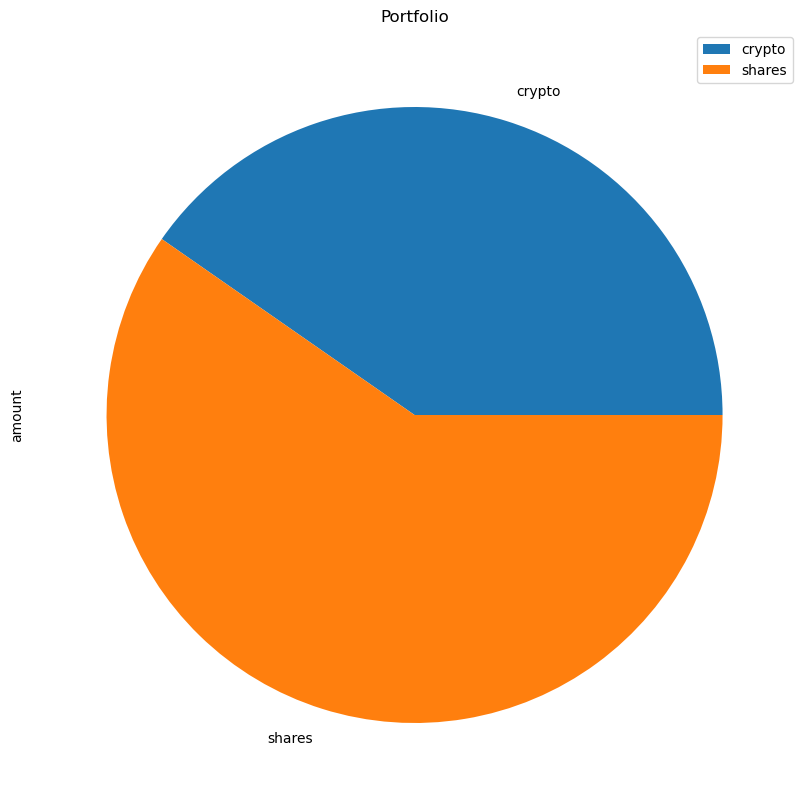

In [213]:
# Plot savings pie chart
plot = df_savings.plot.pie(y= 'amount', title="Portfolio", figsize=(10,10))

In [214]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = consolidated_shares + consolidated_crypto

# Validate saving health
if total_savings == emergency_fund:
    print("You have reached your financial goal!")
elif savings > emergency_fund:
    print("Congrats! You've got moola.")
else:
    print(f"You're ${emergency_fund - total_savings:0.2f} away from your goal. Keep it up!")

Congrats! You've got moola.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [215]:
# Set start and end dates of five years back from today.

start_date = pd.Timestamp('2011-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2018-05-01', tz='America/New_York').isoformat()

In [229]:
# Get 5 years' worth of historical data for SPY and AGG
df_portfolio_5_year = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Separate ticker data

AGG = df_portfolio_5_year[df_portfolio_5_year['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio_5_year[df_portfolio_5_year['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio_5_year = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])

In [232]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative return = 500

samples= 500
weights= [0.40, 0.60]
years= 30

In [233]:
# Printing the simulation input data

MC_portfolio = MCSimulation(
    portfolio_data = df_portfolio_5_year,
    weights = weights,
    num_simulation = samples,
    num_trading_days = 252*years
)

In [234]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 110.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 120.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 130.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 140.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 150.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 160.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 170.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 180.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 190.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 200.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 210.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 220.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 230.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 240.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 250.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 260.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 270.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 280.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 290.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 300.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 310.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 320.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 330.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 340.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 350.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 360.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 370.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 380.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 390.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 400.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 410.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 420.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 430.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 440.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 450.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 460.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 470.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 480.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

Running Monte Carlo simulation number 490.


C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\ricky\BOOTCAMP FOLDER\FIntech Homework\Module_5\Instructions\Starter_Code\MCForecastT

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7557,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7558,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7559,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [235]:
# After running MCSimulation
portfolio_cumulative_returns = portfolio_cumulative_returns.copy()


NameError: name 'portfolio_cumulative_returns' is not defined

In [220]:
# Plot simulation outcomes
line_plot = MC_portfolio.plot_simulation()

In [221]:
# Plot probability distribution and confidence intervals
dist_plot = MC_portfolio.plot_distribution()

### Retirement Analysis

In [222]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl)

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(summary_tbl_5y[8]*initial_investment,2)
ci_upper_five = round(summary_tbl_5y[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'summary_tbl_5y' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [139]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_five = round(summary_tbl_5y[8]*initial_investment,2)
ci_upper_five = round(summary_tbl_5y[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'ci_lower' is not defined